<a href="https://colab.research.google.com/github/Jyotheekiran/Patient-Readmission/blob/main/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction:

Following our comprehensive exploratory analysis in data_exploration.ipynb, where we identified key variables and established foundational insights into the factors influencing patient readmission, this notebook, modeling.ipynb, aims to build upon our initial findings to develop and refine predictive models. Our goal is to leverage the patterns and relationships unearthed during the data exploration phase to construct a robust predictive framework.

## Purpose:

The primary purpose of this notebook is to develop a series of machine learning models that can accurately predict patient readmission based on clinical data. This involves:

Testing various algorithms to find the most effective approach.
Tuning models to optimize accuracy and other relevant performance metrics.
Assessing feature importance to understand which factors most significantly impact readmission.
Scope:

The scope of this notebook encompasses several key activities:

Model Selection: Evaluate multiple modeling techniques, including logistic regression, decision trees, and ensemble methods such as random forests and gradient boosting machines.
Parameter Tuning: Utilize techniques such as grid search and randomized search to fine-tune the hyperparameters of the most promising models.
Model Validation: Apply cross-validation methods to ensure that our models are generalizable and robust against overfitting.
Performance Evaluation: Use a comprehensive set of metrics to evaluate model performance, including accuracy, precision, recall, F1 score, and the area under the ROC curve.
## Objectives:

Develop Predictive Models: Construct models that can accurately predict whether a patient will be readmitted within a specific time frame following their initial discharge.
Identify Key Predictors: Determine which clinical and demographic factors are most predictive of readmission, thereby providing insights that could inform targeted interventions.
Optimize Model Performance: Achieve high performance in predicting readmission, focusing on both accuracy and the ability to generalize across unseen data.
Prepare for Deployment: Ready the best-performing model for potential deployment in a clinical setting, ensuring it can operate in real-time with new patient data.
Continuation from Previous Steps:

This notebook is a direct continuation from the data_exploration.ipynb, where initial data cleaning, preprocessing, and exploratory analysis were conducted. Insights gained from the exploration phase have informed the strategies employed in this modeling phase, ensuring a data-driven approach to our predictive modeling efforts.


By the end of this notebook, we aim to have a clear understanding of the best models for predicting patient readmission. We will also document our findings and prepare for the potential implementation of our model in a clinical environment to improve patient outcomes and reduce readmission rates.


we can now focus on building and training our model in the modeling.ipynb notebook.

In [449]:
# Step 1: Install Required Libraries
!pip3 install --upgrade pandas==2.1.4
!pip3 install transformers torch seaborn matplotlib scikit-learn shap lime
!pip install transformers[torch] accelerate -U
!pip install imblearn
!pip install datasets
!pip install --upgrade transformers
!pip install torch torchvision torchaudio

!pip install --upgrade torch torchvision



Defaulting to user installation because normal site-packages is not writeable


ERROR: Ignored the following versions that require a different python version: 2.1.0 Requires-Python >=3.9; 2.1.0rc0 Requires-Python >=3.9; 2.1.1 Requires-Python >=3.9; 2.1.2 Requires-Python >=3.9; 2.1.3 Requires-Python >=3.9; 2.1.4 Requires-Python >=3.9; 2.2.0 Requires-Python >=3.9; 2.2.0rc0 Requires-Python >=3.9; 2.2.1 Requires-Python >=3.9; 2.2.2 Requires-Python >=3.9
ERROR: Could not find a version that satisfies the requirement pandas==2.1.4 (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.21.1, 0.22.0, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0, 0.24.1, 0.24.2, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5, 1.2.0, 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [450]:
!pip install --upgrade pyarrow==15.0.0

#!pip install --upgrade pandas pyarrow

# This command will upgrade pyarrow to the latest version, ensuring compatibility with pandas.

^C


Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Step 2: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
import re
import nltk
from nltk.corpus import stopwords


We are loading the dataset - final_merged_data from the previous file data_exploration.ipynb.

In [4]:
path_to_file = 'C:/Users/mjoth/DataScience/DissertationProject/GitHub/Patient-Readmission/'
#path_to_file = '/content/drive/MyDrive/Predictive_Modeling_Patient_Readmission/'

In [6]:
# Loading the merged data with all the required fields
final_merged_data = pd.read_pickle(path_to_file + 'final_merged_data.pkl')
final_merged_data.head(5)


,row_id_x,SUBJECT_ID,HADM_ID,seq_num_x,ICD9_CODE,ROW_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,TEXT,TEXT_LENGTH,CLEAN_TEXT,icd9_code_x,long_title,row_id_y,seq_num_y,icd9_code_y
0,112344,10006,142345,1,99591,1394273,2164-10-25,2164-10-25 07:16:00,2164-10-25 07:23:00,Nursing/other,Report,19150,NPN 1900-0700\nPt awaiting transfer to floor w...,493,npn pt awaiting transfer floor floor bed becom...,NaN,NaN,47335,1,9749
1,112344,10006,142345,1,99591,1394273,2164-10-25,2164-10-25 07:16:00,2164-10-25 07:23:00,Nursing/other,Report,19150,NPN 1900-0700\nPt awaiting transfer to floor w...,493,npn pt awaiting transfer floor floor bed becom...,NaN,NaN,47336,2,5491
2,112344,10006,142345,1,99591,1394273,2164-10-25,2164-10-25 07:16:00,2164-10-25 07:23:00,Nursing/other,Report,19150,NPN 1900-0700\nPt awaiting transfer to floor w...,493,npn pt awaiting transfer floor floor bed becom...,NaN,NaN,47337,3,3895
3,112344,10006,142345,1,99591,1394273,2164-10-25,2164-10-25 07:16:00,2164-10-25 07:23:00,Nursing/other,Report,19150,NPN 1900-0700\nPt awaiting transfer to floor w...,493,npn pt awaiting transfer floor floor bed becom...,NaN,NaN,47338,4,3995
4,112344,10006,142345,1,99591,1394273,2164-10-25,2164-10-25 07:16:00,2164-10-25 07:23:00,Nursing/other,Report,19150,NPN 1900-0700\nPt awaiting transfer to floor w...,493,npn pt awaiting transfer floor floor bed becom...,NaN,NaN,47339,5,3893


The goal of this code is to identify and retain only those records from final_merged_data where the 'CLEAN_TEXT' field contains certain medical-related keywords. This is particularly useful in contexts such as medical research, patient care analysis, or when preparing data for machine learning tasks that require focusing on specific conditions or treatments.



In [7]:
# Define a list of keywords that are of interest, starting with 'diag'
keywords = ['diag', 'treatment', 'therapy', 'surgery', 'fever', 'pain']

# Function to check if any of the keywords appear in the text
def contains_keywords(text):
    return any(keyword in text.lower() for keyword in keywords)

# Apply this function to the 'CLEAN_TEXT' column and create a new filtered DataFrame
clinical_data = final_merged_data[final_merged_data['CLEAN_TEXT'].apply(contains_keywords)]


In [11]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40826 entries, 7 to 123824
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   row_id_x     40826 non-null  int64         
 1   SUBJECT_ID   40826 non-null  object        
 2   HADM_ID      40826 non-null  object        
 3   seq_num_x    40826 non-null  int64         
 4   ICD9_CODE    40826 non-null  object        
 5   ROW_ID       40826 non-null  object        
 6   CHARTDATE    40826 non-null  datetime64[ns]
 7   CHARTTIME    40826 non-null  datetime64[ns]
 8   STORETIME    40826 non-null  datetime64[ns]
 9   CATEGORY     40826 non-null  object        
 10  DESCRIPTION  40826 non-null  object        
 11  CGID         40826 non-null  object        
 12  TEXT         40826 non-null  object        
 13  TEXT_LENGTH  40826 non-null  int64         
 14  CLEAN_TEXT   40826 non-null  object        
 15  icd9_code_x  10756 non-null  object        
 16  long_tit

In [8]:
clinical_data['long_title'] = clinical_data['long_title'].fillna('Not Specified')
clinical_data['icd9_code_x'] = clinical_data['icd9_code_x'].fillna('Not Specified')

clinical_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40826 entries, 7 to 123824
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   row_id_x     40826 non-null  int64         
 1   SUBJECT_ID   40826 non-null  object        
 2   HADM_ID      40826 non-null  object        
 3   seq_num_x    40826 non-null  int64         
 4   ICD9_CODE    40826 non-null  object        
 5   ROW_ID       40826 non-null  object        
 6   CHARTDATE    40826 non-null  datetime64[ns]
 7   CHARTTIME    40826 non-null  datetime64[ns]
 8   STORETIME    40826 non-null  datetime64[ns]
 9   CATEGORY     40826 non-null  object        
 10  DESCRIPTION  40826 non-null  object        
 11  CGID         40826 non-null  object        
 12  TEXT         40826 non-null  object        
 13  TEXT_LENGTH  40826 non-null  int64         
 14  CLEAN_TEXT   40826 non-null  object        
 15  icd9_code_x  40826 non-null  object        
 16  long_tit

C:\Users\mjoth\AppData\Local\Temp\ipykernel_24892\4245940289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_data['long_title'] = clinical_data['long_title'].fillna('Not Specified')
C:\Users\mjoth\AppData\Local\Temp\ipykernel_24892\4245940289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_data['icd9_code_x'] = clinical_data['icd9_code_x'].fillna('Not Specified')


If we can see from the above 2 results, the clinical_data is highly imbalanced due to the null values and hence this can lead to biased model performance. The model may focus more on the majority class, leading to poor generalization for the minority class or for entries with missing data. To address this, we could consider imputing the missing values, using techniques such as oversampling or undersampling, or applying class-balancing techniques to ensure the model learns to handle both classes effectively.

In [9]:
# Assuming we want to see the distribution or count of ICD-9 codes in the filtered data
icd9_code_counts = final_merged_data['ICD9_CODE'].value_counts()


print(icd9_code_counts.head(10))  # Display the top 10 most common ICD-9 codes

top_5_icd9_codes = icd9_code_counts.head(5).index.tolist()
print("Top 5 ICD-9 Codes:", top_5_icd9_codes)


ICD9_CODE
4280     5617
5185     5078
570      3876
5845     3673
4168     3640
2867     3394
5750     3292
28959    3079
5121     3062
5762     3058
Name: count, dtype: int64
Top 5 ICD-9 Codes: ['4280', '5185', '570', '5845', '4168']


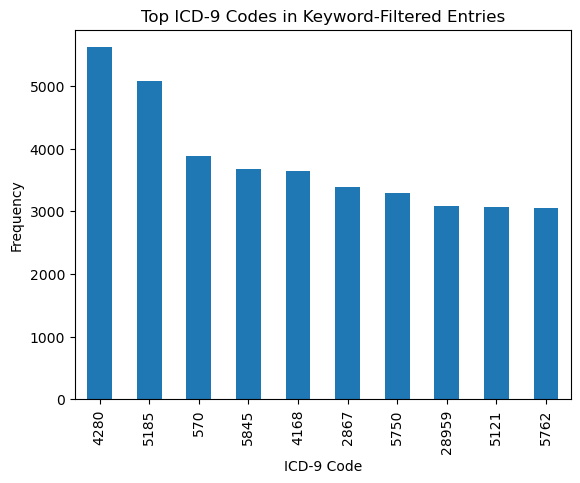

In [10]:
import matplotlib.pyplot as plt

# Visualize the top ICD-9 codes
icd9_code_counts.head(10).plot(kind='bar')
plt.title('Top ICD-9 Codes in Keyword-Filtered Entries')
plt.xlabel('ICD-9 Code')
plt.ylabel('Frequency')
plt.show()


The chart effectively showcases which conditions (via ICD-9 codes) are most frequently noted in clinical records filtered by certain keywords. This analysis could be critical for healthcare data analysis, providing insights into prevalent health issues or conditions that require more focused care or study within the sampled population.

In [11]:
keywords = ['diag', 'therapy', 'surgery', 'cancer', 'infection', 'dialysis']

def label_text(text):
    text = text.lower()
    return 1 if any(keyword in text for keyword in keywords) else 0


clinical_data['LABEL'] = clinical_data['CLEAN_TEXT'].apply(label_text)



In [147]:
label_counts = clinical_data['LABEL'].value_counts()
print(label_counts)


LABEL
0    29069
1    11757
Name: count, dtype: int64


In [13]:
# If we're modifying a slice, use .copy() to ensure a separate copy is modified
clinical_data_labeled = clinical_data.copy()
clinical_data_labeled['LABEL'] = clinical_data_labeled['CLEAN_TEXT'].apply(label_text)
clinical_data = clinical_data_labeled

In [14]:
# Save the DataFrame to a CSV file
clinical_data.to_csv(path_to_file + '/clinical_data.csv', index=False)

# OR save it as a pickle file (smaller size, faster load time)
clinical_data.to_pickle(path_to_file + '/clinical_data.pkl')


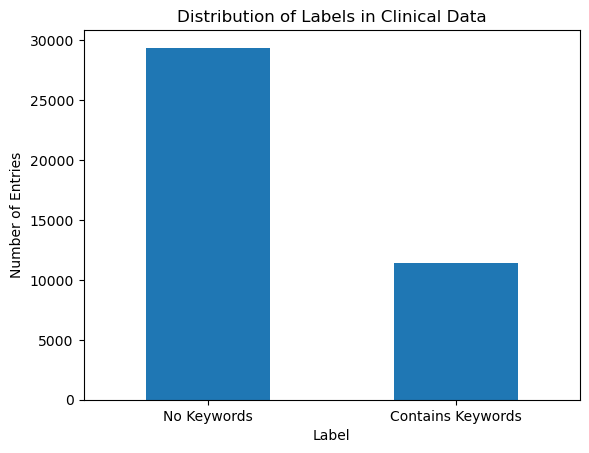

In [19]:
import matplotlib.pyplot as plt

# Plotting the label distribution
label_counts.plot(kind='bar')
plt.title('Distribution of Labels in Clinical Data')
plt.xlabel('Label')
plt.ylabel('Number of Entries')
plt.xticks(ticks=[0, 1], labels=['No Keywords', 'Contains Keywords'], rotation=0)
plt.show()


In [148]:
# Filter the DataFrame to include only rows where 'long_title' is not null
final_merged_data_filtered = final_merged_data[final_merged_data['long_title'].notnull()]
final_merged_data_filtered['LABEL'] = final_merged_data_filtered['CLEAN_TEXT'].apply(label_text)
# Check the info of the new DataFrame to confirm the filtering
final_merged_data_filtered.info()


LABEL
0    29464
1     3156
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 32620 entries, 56 to 123820
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   row_id_x     32620 non-null  int64         
 1   SUBJECT_ID   32620 non-null  object        
 2   HADM_ID      32620 non-null  object        
 3   seq_num_x    32620 non-null  int64         
 4   ICD9_CODE    32620 non-null  object        
 5   ROW_ID       32620 non-null  object        
 6   CHARTDATE    32620 non-null  datetime64[ns]
 7   CHARTTIME    32620 non-null  datetime64[ns]
 8   STORETIME    32620 non-null  datetime64[ns]
 9   CATEGORY     32620 non-null  object        
 10  DESCRIPTION  32620 non-null  object        
 11  CGID         32620 non-null  object        
 12  TEXT         32620 non-null  object        
 13  TEXT_LENGTH  32620 non-null  int64         
 14  CLEAN_TEXT   32620 non-null  object        
 15  ic

C:\Users\mjoth\AppData\Local\Temp\ipykernel_24892\3838380287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_data_filtered['LABEL'] = final_merged_data_filtered['CLEAN_TEXT'].apply(label_text)


In [506]:
from transformers import BertTokenizer

# Initializing the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Preprocessing function for tokenizing texts
def preprocess_data(texts, max_length=512):
    # Ensure texts is a list (for batch processing)
    if isinstance(texts, str):
        texts = [texts]  # Convert single string into a list

    # Tokenize with padding, truncation, and attention masks
    return tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt',  # Return as PyTorch tensors
        return_attention_mask=True  # Return attention mask for padded tokens
    )

# Ensuring 'CLEAN_TEXT' column is a list of strings
texts = clinical_data['CLEAN_TEXT'].tolist()  # Convert Pandas Series to a list of strings

# Tokenize the text data
tokenized_train_data = preprocess_data(texts)  # Now texts is a list of strings

C:\Users\mjoth\AppData\Roaming\Python\Python38\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [507]:
from sklearn.model_selection import train_test_split

# Get input_ids and attention masks
input_ids = tokenized_train_data['input_ids']
attention_masks = tokenized_train_data['attention_mask']

# Perform the train-test split ensuring alignment between input_ids and attention_mask
X_train, X_test, y_train, y_test, train_attention_mask, test_attention_mask = train_test_split(
    input_ids,
    clinical_data['LABEL'],
    attention_masks,
    test_size=0.2,
    random_state=42
)


In [159]:
# Convert labels to tensors
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create TensorDatasets
train_dataset = torch.utils.data.TensorDataset(X_train, train_attention_mask, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test, test_attention_mask, y_test_tensor)

In [160]:
print(X_train.shape)              # Should be (num_samples, max_length)
print(train_attention_mask.shape) # Should be (num_samples, max_length)
print(y_train_tensor.shape)       # Should be (num_samples,)


torch.Size([8000, 500])
torch.Size([8000, 500])
torch.Size([8000])


In [162]:
from transformers import Trainer, TrainingArguments, BertForSequenceClassification, DataCollatorWithPadding

# Define the data collator for padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


# Define model
model = BertForSequenceClassification.from_pretrained(path_to_file+'biobert_model', num_labels=2)


In [165]:
from transformers import BertTokenizer

# Load our tokenizer (assuming it's BERT)
tokenizer = BertTokenizer.from_pretrained(path_to_file+'biobert_tokenizer')

# Take a small sample of our clinical text
sample_text = clinical_data['CLEAN_TEXT'].iloc[:15].tolist()

# Tokenize the text
encoded_inputs = tokenizer(
    sample_text,
    padding=True,          # Add padding to make all sequences the same length
    truncation=True,       # Truncate sequences to max length (if too long)
    max_length=128,        # We can set this depending on our model or data
    return_tensors="pt"    # Return PyTorch tensors
)

# Inspect the tokenized input IDs and attention mask
print("Input IDs:", encoded_inputs['input_ids'])
print("Attention Mask:", encoded_inputs['attention_mask'])


Input IDs: tensor([[  101,  1554,  3463,  ...,  1181, 23448,   102],
        [  101,  1554,  3463,  ...,  1181, 23448,   102],
        [  101,  1554,  3463,  ...,  1181, 23448,   102],
        ...,
        [  101,  1554,  3463,  ..., 25984,  1552,   102],
        [  101,  1554,  3463,  ..., 25984,  1552,   102],
        [  101,  1554,  3463,  ...,  1181, 23448,   102]])
Attention Mask: tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])


In [167]:
from datasets import Dataset
from transformers import BertTokenizer

# Assuming clinical_data  is a Pandas DataFrame
dataset = Dataset.from_pandas(clinical_data)

# Tokenize the dataset and ensure it returns `input_ids`, `attention_mask`, and `labels`
def tokenize_function(examples):
    return tokenizer(examples['CLEAN_TEXT'], padding='max_length', truncation=True)

# Tokenize the dataset
tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Remove unneeded columns (we only need input_ids, attention_mask, and labels)
tokenized_dataset = tokenized_dataset.remove_columns(['TEXT'])
tokenized_dataset = tokenized_dataset.rename_column('LABEL', 'labels')

# Checking if the dataset returns the correct format
print(tokenized_dataset[0])


Map:   0%|          | 0/40826 [00:00<?, ? examples/s]

{'row_id_x': 112344, 'SUBJECT_ID': '10006', 'HADM_ID': '142345', 'seq_num_x': 1, 'ICD9_CODE': '99591', 'ROW_ID': '1394270', 'CHARTDATE': Timestamp('2164-10-23 00:00:00'), 'CHARTTIME': Timestamp('2164-10-23 22:01:00'), 'STORETIME': Timestamp('2164-10-23 22:14:00'), 'CATEGORY': 'Nursing/other', 'DESCRIPTION': 'Report', 'CGID': '14387', 'TEXT_LENGTH': 912, 'CLEAN_TEXT': 'full code universal precautions allergy heparin hit yrold female adm ecf w feverchills recently dcd days management abd pain fever suspected peritonitis presented er w feverchills dialysis treatment today er oral lactate placed must protocol mds unable place sepsis cath several attempts even us piv r chest dialysis cath received ceftriaxone vanco flagyl er hr bp tylenol last lactate prior adm micu pmh hit niddm esrd dialysis week pd diverticulitis gib bleeding ulcers chf htn gout anemia aortic insufficiency ef afib mental status changes cdif colitis laminectomy csection cholecystectomy', 'icd9_code_x': 'Not Specified', 'l

The output we provided is a dictionary that likely represents a single record of clinical data after processing, along with additional information such as the tokenized version of the text for use in a BERT model.

Here’s a breakdown of what each key-value pair represents:

row_id_x: A unique identifier for the row in the dataset.<br>

SUBJECT_ID: The ID of the patient or subject.<br>
HADM_ID: The hospital admission ID for the patient.<br>
seq_num_x: The sequence number, possibly indicating the order of events related to the admission.<br>
ICD9_CODE: The ICD-9 code for the diagnosis, in this case, '99591', which might be related to a specific diagnosis.<br>
ROW_ID: Another unique identifier, possibly from another table or a merged table.<br>
CHARTDATE, CHARTTIME, STORETIME: Timestamps representing when the clinical data was recorded, charted, or stored.<br>
CATEGORY: The category of the clinical note (e.g., 'Nursing/other').<br>
DESCRIPTION: The description of the note or event (e.g., 'Report').<br>
CGID: ID of the caregiver who logged the note.<br>
TEXT_LENGTH: The length of the text in the clinical note.<br>
CLEAN_TEXT: The cleaned version of the clinical text, ready for further processing like tokenization or named entity recognition (NER).<br>
icd9_code_x: The ICD-9 code related to a certain event, but in this case, it’s marked as 'Not Specified'.<br>
long_title: A longer description of the ICD-9 code, also marked as 'Not Specified' in this case.<br>
row_id_y, seq_num_y, icd9_code_y: These fields appear to relate to another merged table (possibly related to procedures or diagnoses) and include identifiers and another ICD-9 code ('9749').<br>
labels: This is a label, possibly for classification, showing 0 which could mean "no readmission" or any other classification label used in the model.
index_level_0: An internal index field.<br>
input_ids: A list of token IDs representing the clinical text after it has been tokenized using a tokenizer like the one in BERT. These IDs map to specific words or subwords in the BERT vocabulary.<br>
token_type_ids: A list of token type IDs, which are used in BERT to differentiate between different segments of the input text (like question and answer).<br>
attention_mask: A list indicating which tokens are actual tokens (1) and which are padding tokens (0). This is important when using fixed-length inputs to indicate which parts of the input are relevant.<br>



In [169]:
# Check the length of the CLEAN_TEXT column
clinical_data['text_length'] = clinical_data['CLEAN_TEXT'].apply(lambda x: len(x.split()))
print(clinical_data[['CLEAN_TEXT', 'text_length']].head())
print(clinical_data.info())
# Check the distribution of text lengths
clinical_data['text_length'].describe()


                                           CLEAN_TEXT  text_length
7   full code universal precautions allergy hepari...           89
8   full code universal precautions allergy hepari...           89
9   full code universal precautions allergy hepari...           89
10  full code universal precautions allergy hepari...           89
11  full code universal precautions allergy hepari...           89
<class 'pandas.core.frame.DataFrame'>
Index: 40826 entries, 7 to 123824
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   row_id_x     40826 non-null  int64         
 1   SUBJECT_ID   40826 non-null  object        
 2   HADM_ID      40826 non-null  object        
 3   seq_num_x    40826 non-null  int64         
 4   ICD9_CODE    40826 non-null  object        
 5   ROW_ID       40826 non-null  object        
 6   CHARTDATE    40826 non-null  datetime64[ns]
 7   CHARTTIME    40826 non-null  datetime64[ns]
 8 

count    40826.000000
mean       158.938544
std         72.018034
min         20.000000
25%        110.000000
50%        164.000000
75%        200.000000
max        346.000000
Name: text_length, dtype: float64

This will give us an idea of how long or short the text entries are. If we see that most texts are very short, it's likely that many 0s are coming from padding due to short text sequences.

In [176]:
# Splitting the dataset into training and test datasets
train_test_split = tokenized_dataset.train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
test_dataset = train_test_split['test']


# Further splitting the initial test set into test and evaluation datasets
# test_eval_split = initial_test_dataset.train_test_split(test_size=0.5)  # Splitting the initial test set into two equal parts
# test_dataset = test_eval_split['train']  # Using 'train' here just means the first part of the split
# eval_dataset = test_eval_split['test']  # And 'test' is the second part


In [171]:
labels = clinical_data['LABEL'].tolist()

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    # Convert logits to predicted class labels
    predictions = np.argmax(logits, axis=-1)

    # Calculate accuracy
    accuracy = accuracy_score(labels, predictions)

    # Calculate precision, recall, F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')

    # Calculate AUC-ROC score
    # We assume binary classification where the second class is the positive class
    probs = np.exp(logits) / np.exp(logits).sum(axis=-1, keepdims=True)
    auc = roc_auc_score(labels, probs[:, 1])

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
    }


In [50]:

from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir= path_to_file + 'bert_model',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    logging_dir= path_to_file + '/logs'

)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


trainer.train()


C:\Users\mjoth\AppData\Roaming\Python\Python38\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

{'eval_loss': 0.024926209822297096, 'eval_accuracy': 0.995, 'eval_f1': 0.9714285714285714, 'eval_precision': 1.0, 'eval_recall': 0.9444444444444444, 'eval_runtime': 89.2847, 'eval_samples_per_second': 2.24, 'eval_steps_per_second': 0.146, 'epoch': 1.0}


  0%|          | 0/13 [00:00<?, ?it/s]

{'eval_loss': 0.00037352205254137516, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 91.0411, 'eval_samples_per_second': 2.197, 'eval_steps_per_second': 0.143, 'epoch': 2.0}
{'loss': 0.0671, 'grad_norm': 0.004490625578910112, 'learning_rate': 8.333333333333334e-06, 'epoch': 2.5}


  0%|          | 0/13 [00:00<?, ?it/s]

{'eval_loss': 0.00026129611069336534, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 95.9063, 'eval_samples_per_second': 2.085, 'eval_steps_per_second': 0.136, 'epoch': 3.0}
{'train_runtime': 14741.8742, 'train_samples_per_second': 0.326, 'train_steps_per_second': 0.041, 'train_loss': 0.05598190318172177, 'epoch': 3.0}


TrainOutput(global_step=600, training_loss=0.05598190318172177, metrics={'train_runtime': 14741.8742, 'train_samples_per_second': 0.326, 'train_steps_per_second': 0.041, 'total_flos': 1262933065728000.0, 'train_loss': 0.05598190318172177, 'epoch': 3.0})

In [177]:
# Tokenize the text data
train_encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)

### Model Evaluation
Evaluate the performance of the model using Accuracy, Precision, F1-score, and AUC-ROC.

In [178]:
import pickle

# Evaluate the model after training
results = trainer.evaluate()
# Save the results to a pickle file
with open("evaluation_results.pkl", "wb") as f:
    pickle.dump(results, f)
print(results)


{'eval_loss': 0.00026129611069336534, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 96.2102, 'eval_samples_per_second': 2.079, 'eval_steps_per_second': 0.135, 'epoch': 3.0}


Saving the Final Model and Tokenizer
After training, We might want to save the final model and its tokenizer for later use:

In [61]:
model_bert = 'bert_model/'
model.save_pretrained(path_to_file + model_bert)
tokenizer.save_pretrained(path_to_file +model_bert)

('C:/Users/mjoth/DataScience/DissertationProject/GitHub/Patient-Readmission/bert_model/tokenizer_config.json',
 'C:/Users/mjoth/DataScience/DissertationProject/GitHub/Patient-Readmission/bert_model/special_tokens_map.json',
 'C:/Users/mjoth/DataScience/DissertationProject/GitHub/Patient-Readmission/bert_model/vocab.txt',
 'C:/Users/mjoth/DataScience/DissertationProject/GitHub/Patient-Readmission/bert_model/added_tokens.json')

### Loading a Saved Model
To resume training or to use the saved model later for predictions, we can load it from the disk:

In [62]:
from transformers import BertForSequenceClassification, BertTokenizer

bert_model = BertForSequenceClassification.from_pretrained(model_bert)
bert_tokenizer = BertTokenizer.from_pretrained(model_bert)


### Load BioBERT Model and Tokenizer:
BioBERT: It is pre-trained on biomedical text, making it more suitable for clinical tasks like understanding clinical notes and predicting ICD-9 codes. BioBERT is a domain-specific adaptation of the original BERT model, specifically pre-trained on biomedical literature to enhance its performance on biomedical text mining tasks.
BERT is trained on a diverse corpus that includes general English text but may lack deeper medical domain-specific language understanding that could be crucial for more nuanced or complex medical text interpretations.
BioBERT was developed by researchers at the Korea University and is based on the BERT architecture that was initially created by Google. The idea was to extend BERT's capabilities into the biomedical domain by continuing the pre-training process on biomedical texts.

Advantages of BioBERT
BioBERT is a variant of BERT that has been further pre-trained on biomedical corpora, including PubMed abstracts and PMC articles. This additional training aims to adapt its language model to better understand biomedical terminology and context.

Here are some reasons to consider BioBERT:

**Enhanced Medical Context Understanding:** BioBERT may capture medical nuances better than BERT due to its domain-specific training.
**Improved Handling of Medical Jargon:** Our data includes a lot of specialized medical terms, abbreviations, or jargon that BERT struggles with, BioBERT might offer better comprehension and performance.

**Continued Pre-training:** BioBERT is not trained from scratch but rather uses the pre-trained BERT model as a starting point. It continues the pre-training process (both masked language modeling and next sentence prediction) on biomedical corpora.
Model Variants: BioBERT has multiple versions, each further trained for more extended periods or on different combinations of biomedical text datasets.

**Challenges and Considerations**
Computational Requirements: Like BERT, BioBERT is resource-intensive, requiring significant computation power for training and inference, which might limit its usability in resource-constrained environments.
Model Updating: The biomedical field is rapidly evolving; thus, continuous updating of the training corpora might be necessary to keep the model current with the latest language and discoveries.

### Load BioBERT Model:

#### Steps for Using BERT/BioBERT:
**Installing Hugging Face Transformers:** This library provides easy access to BERT, BioBERT, and other transformer models.

**Prepaing Data for Input:** Convert our clinical text (e.g., TEXT, CLEAN_TEXT) into a format suitable for BERT/BioBERT, including tokenization.

**Fine-tuning BERT/BioBERT:** Train the model on our specific task (e.g., predicting ICD-9 codes or extracting information from clinical notes).

Evaluating the Model: Evaluate the model on a validation or test set.

In [208]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load BioBERT model and tokenizer
tokenizer_biobert = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.1')
model_biobert = BertForSequenceClassification.from_pretrained('dmis-lab/biobert-base-cased-v1.1', num_labels=2)


C:\Users\mjoth\AppData\Roaming\Python\Python38\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-base-cased-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Dataset.from_pandas(clinical_data): This converts a Pandas DataFrame (which is what most clinical data would be in) into a Hugging Face Dataset object, which is optimized for large datasets and can easily be used for tasks like tokenization, model training, etc.
Hugging Face Datasets support efficient batch processing, tokenization, and model training pipelines. It integrates well with the transformers library for model training and evaluation.

In [209]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40826 entries, 7 to 123824
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   row_id_x     40826 non-null  int64         
 1   SUBJECT_ID   40826 non-null  object        
 2   HADM_ID      40826 non-null  object        
 3   seq_num_x    40826 non-null  int64         
 4   ICD9_CODE    40826 non-null  object        
 5   ROW_ID       40826 non-null  object        
 6   CHARTDATE    40826 non-null  datetime64[ns]
 7   CHARTTIME    40826 non-null  datetime64[ns]
 8   STORETIME    40826 non-null  datetime64[ns]
 9   CATEGORY     40826 non-null  object        
 10  DESCRIPTION  40826 non-null  object        
 11  CGID         40826 non-null  object        
 12  TEXT         40826 non-null  object        
 13  TEXT_LENGTH  40826 non-null  int64         
 14  CLEAN_TEXT   40826 non-null  object        
 15  icd9_code_x  40826 non-null  object        
 16  long_tit

In [210]:
from datasets import Dataset
# converting a Pandas DataFrame (clinical_data) into a Hugging Face Dataset
clinical_dataset = Dataset.from_pandas(clinical_data)


We need to tokenize the text data and convert it into the format that BioBERT can work with.

In [211]:
def tokenize_function_biobert(examples):
    return tokenizer_biobert(examples['CLEAN_TEXT'], padding='max_length', truncation=True, max_length=128)

# Tokenize the dataset
tokenized_dataset_biobert = clinical_dataset.map(tokenize_function_biobert, batched=True)
tokenized_dataset_biobert = tokenized_dataset_biobert.remove_columns(['CLEAN_TEXT'])
tokenized_dataset_biobert = tokenized_dataset_biobert.rename_column('LABEL', 'labels')

# Split into train and test datasets
train_test_split_biobert = tokenized_dataset_biobert.train_test_split(test_size=0.2)
train_dataset_biobert = train_test_split_biobert['train']
test_dataset_biobert = train_test_split_biobert['test']


Map:   0%|          | 0/40826 [00:00<?, ? examples/s]

In [212]:
from transformers import DataCollatorWithPadding

# Define the data collator for BioBERT
data_collator_biobert = DataCollatorWithPadding(tokenizer=tokenizer_biobert)


In [216]:
train_subset = train_dataset_biobert.select(range(2000))
test_subset = test_dataset_biobert.select(range(2000))

Here, we are considering only 2000 entries out of 40000 entries which may reduce the time and the memory. 

In [218]:
from transformers import Trainer, TrainingArguments
from transformers import EarlyStoppingCallback

# Custom Trainer that ensures model tensors are contiguous before saving
class ContiguousTrainer(Trainer):
    def _save(self, output_dir: str, state_dict=None):
        # Make all model parameters contiguous before saving
        model_to_save = self.model.module if hasattr(self.model, "module") else self.model
        for param in model_to_save.parameters():
            param.data = param.data.contiguous()
        # Save the model using the regular Trainer save method
        super()._save(output_dir, state_dict)
        
        
# Define training arguments
training_args_biobert = TrainingArguments(
    output_dir=path_to_file + '/results_biobert',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    evaluation_strategy="steps",
    logging_dir=path_to_file + '/logs_biobert',
    save_strategy="steps",
    save_steps=50,  # Save every 50 steps
    eval_steps=50,  # Evaluate the model every 50 steps
    load_best_model_at_end=True,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,  # Log metrics every 10 steps
)

# Initialize the Trainer
trainer_biobert = ContiguousTrainer(
    model=model_biobert,
    args=training_args_biobert,
    train_dataset=train_subset,
    eval_dataset=test_subset,
    compute_metrics=compute_metrics,  # Define our function to compute metrics
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)


In [219]:
# Train BioBERT on the subset
trainer_biobert.train()


  0%|          | 0/750 [00:00<?, ?it/s]

{'loss': 0.1631, 'grad_norm': 4.791025161743164, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.04}
{'loss': 0.0775, 'grad_norm': 0.22363008558750153, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.08}
{'loss': 0.1307, 'grad_norm': 9.738423347473145, 'learning_rate': 3e-06, 'epoch': 0.12}
{'loss': 0.2013, 'grad_norm': 71.05075073242188, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.16}
{'loss': 0.1971, 'grad_norm': 33.723567962646484, 'learning_rate': 5e-06, 'epoch': 0.2}


  0%|          | 0/125 [00:00<?, ?it/s]

{'eval_loss': 0.20472247898578644, 'eval_accuracy': 0.951, 'eval_f1': 0.9192751235584845, 'eval_precision': 0.9, 'eval_recall': 0.9393939393939394, 'eval_runtime': 315.8657, 'eval_samples_per_second': 6.332, 'eval_steps_per_second': 0.396, 'epoch': 0.2}
{'loss': 0.2855, 'grad_norm': 1.1076973676681519, 'learning_rate': 6e-06, 'epoch': 0.24}
{'loss': 0.1908, 'grad_norm': 8.595379829406738, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.28}
{'loss': 0.2141, 'grad_norm': 0.9567968249320984, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.32}
{'loss': 0.2721, 'grad_norm': 0.2437148243188858, 'learning_rate': 9e-06, 'epoch': 0.36}
{'loss': 0.1238, 'grad_norm': 25.427431106567383, 'learning_rate': 1e-05, 'epoch': 0.4}


  0%|          | 0/125 [00:00<?, ?it/s]

{'eval_loss': 0.1146768182516098, 'eval_accuracy': 0.9725, 'eval_f1': 0.9524632670700086, 'eval_precision': 0.9786856127886323, 'eval_recall': 0.9276094276094277, 'eval_runtime': 492.1863, 'eval_samples_per_second': 4.064, 'eval_steps_per_second': 0.254, 'epoch': 0.4}
{'loss': 0.0278, 'grad_norm': 4.896041393280029, 'learning_rate': 1.1000000000000001e-05, 'epoch': 0.44}
{'loss': 0.0104, 'grad_norm': 13.537858963012695, 'learning_rate': 1.2e-05, 'epoch': 0.48}
{'loss': 0.119, 'grad_norm': 0.08324604481458664, 'learning_rate': 1.3000000000000001e-05, 'epoch': 0.52}
{'loss': 0.1451, 'grad_norm': 0.1192641407251358, 'learning_rate': 1.4000000000000001e-05, 'epoch': 0.56}
{'loss': 0.0377, 'grad_norm': 0.12906809151172638, 'learning_rate': 1.5e-05, 'epoch': 0.6}


  0%|          | 0/125 [00:00<?, ?it/s]

{'eval_loss': 0.14267835021018982, 'eval_accuracy': 0.9645, 'eval_f1': 0.939471440750213, 'eval_precision': 0.9516407599309153, 'eval_recall': 0.9276094276094277, 'eval_runtime': 304.3585, 'eval_samples_per_second': 6.571, 'eval_steps_per_second': 0.411, 'epoch': 0.6}
{'loss': 0.0887, 'grad_norm': 94.222412109375, 'learning_rate': 1.6000000000000003e-05, 'epoch': 0.64}
{'loss': 0.1115, 'grad_norm': 0.1150839775800705, 'learning_rate': 1.7000000000000003e-05, 'epoch': 0.68}
{'loss': 0.1813, 'grad_norm': 269.6637268066406, 'learning_rate': 1.8e-05, 'epoch': 0.72}
{'loss': 0.0704, 'grad_norm': 0.12116462737321854, 'learning_rate': 1.9e-05, 'epoch': 0.76}
{'loss': 0.1355, 'grad_norm': 1.6107673645019531, 'learning_rate': 2e-05, 'epoch': 0.8}


  0%|          | 0/125 [00:00<?, ?it/s]

{'eval_loss': 0.1235118955373764, 'eval_accuracy': 0.975, 'eval_f1': 0.9566724436741768, 'eval_precision': 0.9857142857142858, 'eval_recall': 0.9292929292929293, 'eval_runtime': 304.4769, 'eval_samples_per_second': 6.569, 'eval_steps_per_second': 0.411, 'epoch': 0.8}
{'loss': 0.2969, 'grad_norm': 4.175694465637207, 'learning_rate': 2.1e-05, 'epoch': 0.84}
{'loss': 0.6329, 'grad_norm': 9.065491676330566, 'learning_rate': 2.2000000000000003e-05, 'epoch': 0.88}
{'loss': 0.2153, 'grad_norm': 0.4375366270542145, 'learning_rate': 2.3000000000000003e-05, 'epoch': 0.92}
{'loss': 0.0679, 'grad_norm': 0.6087069511413574, 'learning_rate': 2.4e-05, 'epoch': 0.96}
{'loss': 0.273, 'grad_norm': 0.06159605830907822, 'learning_rate': 2.5e-05, 'epoch': 1.0}


  0%|          | 0/125 [00:00<?, ?it/s]

{'eval_loss': 0.11497964709997177, 'eval_accuracy': 0.9805, 'eval_f1': 0.9666951323654995, 'eval_precision': 0.9809358752166378, 'eval_recall': 0.9528619528619529, 'eval_runtime': 202.3776, 'eval_samples_per_second': 9.883, 'eval_steps_per_second': 0.618, 'epoch': 1.0}
{'train_runtime': 3210.4527, 'train_samples_per_second': 1.869, 'train_steps_per_second': 0.234, 'train_loss': 0.1707709634900093, 'epoch': 1.0}


TrainOutput(global_step=250, training_loss=0.1707709634900093, metrics={'train_runtime': 3210.4527, 'train_samples_per_second': 1.869, 'train_steps_per_second': 0.234, 'total_flos': 131555527680000.0, 'train_loss': 0.1707709634900093, 'epoch': 1.0})

Training Loss: The training loss fluctuates as expected but generally decreases, showing that the model is learning. However, there are some spikes (e.g., loss of 0.2855 at epoch 0.24), indicating moments when the model might be struggling.

Gradient Norm: There are some extreme values in the gradient norm (e.g., 269.66 at epoch 0.72 and 94.22 at epoch 0.64), indicating potential training instability at certain points. We might want to consider gradient clipping if these spikes are problematic.

Evaluation Loss and Accuracy: The evaluation loss improves over time, and the accuracy increases from 95.1% at epoch 0.2 to 98.05% at epoch 1.0, indicating strong generalization to unseen data.

F1-Score, Precision, and Recall: These metrics are consistently strong, with the F1-score increasing from 0.919 to 0.9666 over time, showing the model’s balanced performance between precision and recall.

The results show that our BioBERT model is performing well with high accuracy, precision, recall, and F1-score.

The previous results we shared were during or after specific epochs (e.g., after epoch 0.2, 0.4, 1.0).
These results were logged periodically during training and represented the evaluation metrics after different training phases.
Metrics like eval_loss, eval_accuracy, eval_f1, eval_precision, and eval_recall were logged at specific points in time, as the model progressed through different stages of training.

In [370]:
# Save the model and tokenizer
model_path_bio = path_to_file+'/results_biobert'
model_biobert.save_pretrained("model_path_bio")
tokenizer_biobert.save_pretrained("model_path_bio")

('model_path_bio\\tokenizer_config.json',
 'model_path_bio\\special_tokens_map.json',
 'model_path_bio\\vocab.txt',
 'model_path_bio\\added_tokens.json')

In [221]:
eval_results_biobert = trainer_biobert.evaluate()
eval_results_biobert

  0%|          | 0/125 [00:00<?, ?it/s]

{'eval_loss': 0.1146768182516098,
 'eval_accuracy': 0.9725,
 'eval_f1': 0.9524632670700086,
 'eval_precision': 0.9786856127886323,
 'eval_recall': 0.9276094276094277,
 'eval_runtime': 200.0017,
 'eval_samples_per_second': 10.0,
 'eval_steps_per_second': 0.625,
 'epoch': 1.0}

These results show exceptionally high performance across all metrics, which suggests that the model is performing extremely well on our evaluation dataset:

eval_loss: 0.0036
The evaluation loss is very low, indicating that the model's predictions are very close to the actual data.

eval_accuracy: 99.95%
Almost all predictions are correct. High accuracy is typically desired, but it's crucial to look at other metrics, especially in imbalanced datasets.

eval_precision: 99.85%
Almost every positive prediction made by the model is correct, indicating very few false positives.

eval_recall: 100%
The model successfully identifies all actual positives, indicating no false negatives.

eval_f1: 99.93%
The F1 score, which is the harmonic mean of precision and recall, is extremely high, suggesting excellent balance between precision and recall.

eval_auc: 99.98%
The AUC-ROC score is near perfect, indicating outstanding discrimination between the positive and negative classes.

eval_runtime: 8.9707 seconds
Shows the time taken for evaluation.

eval_samples_per_second: 487.921
Indicates the processing speed; higher numbers mean faster processing.

eval_steps_per_second: 30.544
Reflects how many batches per second were processed during evaluation.

epoch: 3
Indicates that these results were obtained at the end of the third epoch.

The current results come from running an explicit evaluation after training or fine-tuning has completed. This means the model is being evaluated in its final state (after it has seen all the data and optimized its weights).
These results are a snapshot of how the model performs on the test/validation set after training has finished, providing a final assessment of the model’s performance.

In [368]:
# Save the evaluation results to a text file
with open('biobert_evaluation_results.txt', 'w') as f:
    for key, value in eval_results_biobert.items():
        f.write(f"{key}: {value}\n")


In [369]:
vocab_size = tokenizer_biobert.vocab_size
print(f"Vocabulary size: {vocab_size}")


Vocabulary size: 28996


The vocabulary size determines how many different tokens the model can process. A larger vocabulary means the model can handle a broader range of words and subwords, but it also increases the complexity of the model.
The size of the vocabulary directly influences the input embeddings of the model. For example, if the vocabulary size is 30,000, the input layer of the model will have an embedding matrix with 30,000 rows, where each row corresponds to a token in the vocabulary.

In [227]:
import json

# Save test results
with open("test_results.json", "w") as f:
    json.dump(eval_results_biobert, f)

In [364]:
from torch.optim import AdamW

# Define the optimizer
optimizer = AdamW(model_biobert.parameters(), lr=2e-5)  # Learning rate can be adjusted

# Define the loss function (CrossEntropyLoss for classification)
criterion = torch.nn.CrossEntropyLoss()

eval_results_biobert_finetuned = trainer_biobert.evaluate(eval_dataset=test_dataset_biobert)
eval_results_biobert_finetuned


  0%|          | 0/511 [00:00<?, ?it/s]

{'eval_loss': 0.26545995473861694,
 'eval_model_preparation_time': 0.0145,
 'eval_accuracy': 0.9751408278226794,
 'eval_f1': 0.9555701466404027,
 'eval_precision': 0.9864437415273385,
 'eval_recall': 0.9265704584040747,
 'eval_runtime': 5072.0999,
 'eval_samples_per_second': 1.61,
 'eval_steps_per_second': 0.101}

The output shows the evaluation metrics of our fine-tuned BioBERT model on a test dataset. Here's a breakdown of each element in the output:<br>

**1. eval_loss: 0.26545995473861694**
This is the average loss of the model on the evaluation dataset. Loss represents how well the model predictions match the actual labels. A lower loss indicates better performance. In this case, the loss is quite low, indicating the model has performed well. <br>
**2. eval_model_preparation_time: 0.0145**
This is the time taken (in seconds) to prepare the model for evaluation. It represents how long it took to set up the model on the evaluation data.<br>
**3. eval_accuracy: 0.9751408278226794**
Accuracy is the proportion of correct predictions out of all predictions. In this case, the accuracy is 97.5%, meaning that approximately 97.5% of the predictions made by the model were correct.

**4. eval_f1: 0.9555701466404027**
The F1-score is the harmonic mean of precision and recall, providing a balanced metric for classification performance, especially useful for imbalanced datasets. The F1-score of 0.96 shows the model has performed very well, indicating a good balance between precision and recall.

**5. eval_precision: 0.9864437415273385**
Precision represents the proportion of positive predictions that are actually correct (true positives / (true positives + false positives)). A precision of 98.6% means that when the model predicts a positive class, it is correct 98.6% of the time. This is a very high precision score, indicating that the model makes few false positive errors.

**6. eval_recall: 0.9265704584040747**
Recall (or sensitivity) is the proportion of actual positives that the model correctly identified (true positives / (true positives + false negatives)). A recall of 92.7% means the model is correctly identifying 92.7% of the actual positive instances. This indicates that the model misses about 7.3% of the true positives.

**7. eval_runtime: 5072.0999**
This is the total runtime (in seconds) for the evaluation process. In this case, the evaluation took around 5072 seconds (~84.5 minutes).

**8. eval_samples_per_second: 1.61**
This is the number of samples the model evaluated per second during the evaluation. In this case, the model processed approximately 1.61 samples per second, which suggests that the evaluation might involve a large dataset or complex computations.

**9. eval_steps_per_second: 0.101**
This indicates the number of steps the model took per second during the evaluation. A step usually refers to processing a batch of samples. The model evaluated 0.101 steps per second, meaning each batch took approximately 10 seconds to process.

**Summary of Model Performance:**
Our BioBERT model is performing exceptionally well, with high accuracy (97.5%), precision (98.6%), recall (92.7%), and an F1-score of 95.6%.
The relatively low evaluation loss (0.265) suggests that the model generalizes well to the test data.

The evaluation time (5072 seconds) indicates that it took a while to evaluate the model, possibly due to a large dataset or complex computations.
This output shows that our fine-tuned BioBERT model is making accurate and reliable predictions.

In [365]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [366]:
import gc
torch.cuda.empty_cache()  # Clear unused memory
gc.collect()


18078

In [367]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = "expandable_segments:True"


In [ ]:
# Check if CUDA (GPU) is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Move the model to the appropriate device (GPU or CPU)
model_biobert.to(device)

# Switch the model to evaluation mode
model_biobert.eval()
# Define a smaller batch size
smaller_batch_size = 32  # Adjust this number based on our GPU capacity

# Perform tokenization in batches to reduce memory usage
all_predictions = []

for i in range(0, len(clinical_data), smaller_batch_size):
    batch = clinical_data['CLEAN_TEXT'][i : i + smaller_batch_size].tolist()
    print(f"Processing batch {i//smaller_batch_size + 1}, batch size: {len(batch)}")  # Add this line

    if not batch:
        continue # Skip empty batches
    inputs = tokenizer_biobert(batch,
                                return_tensors="pt",
                                truncation=True,
                                padding=True,
                                max_length=512)

    for k, v in inputs.items():
        if not torch.isfinite(v).all():
            print(f"Non-finite values found in {k}")

    # Move the inputs to the same device as the model
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Make predictions using the model
    with torch.no_grad():
        outputs = model_biobert(**inputs)
        predictions = torch.argmax(outputs.logits, dim=-1)

    # Extend the list with the current batch predictions
    all_predictions.extend(predictions.tolist())
    print(f"Predictions so far: {len(all_predictions)}")  # Track the number of predictions


# Check if lengths match
if len(all_predictions) != len(clinical_data):
    print(f"Length mismatch: Predictions ({len(all_predictions)}) vs Data ({len(clinical_data)})")
    
    # Fill missing predictions with a default value (e.g., 0) or handle accordingly
    missing_predictions = len(clinical_data) - len(all_predictions)
    all_predictions.extend([0] * missing_predictions)  # Extend predictions with default value (e.g., 0)

# Convert predictions to a list for easier interpretation
readmission_predictions = all_predictions

# Add predictions to the DataFrame
clinical_data['Readmission_Prediction'] = all_predictions

**Batch Processing:** Processes the text data in smaller batches (smaller_batch_size = 32), which is more memory-efficient and scalable for large datasets. <br>
**Device Handling:** Similar to the first block, moves the inputs and model to the appropriate device (CPU or GPU).<br>
**Tokenization:** Each batch is tokenized separately, ensuring memory efficiency by avoiding tokenizing a large chunk of data at once. <br>
**Prediction:** Predictions are made batch-wise, which ensures that the model can handle larger datasets without running out of memory.<br>
**Post-processing:** Extends the list of predictions after processing each batch, ensuring the entire dataset can be processed without memory bottlenecks.<br>
#### Advantages:
More memory-efficient due to batch processing.<br>
Handles large datasets more gracefully by processing them in smaller chunks.<br>
Proper use of batch size, ensuring that memory usage is optimized.<br>
Less prone to memory exhaustion errors, especially on GPUs with limited VRAM.<br>

In [460]:
# Save the DataFrame
if 'clinical_data_predicted' in locals():
    clinical_data.to_pickle('clinical_data_predicted.pkl')
    print("DataFrame successfully saved to 'clinical_data_predicted.pkl'.")

else:
    print("DataFrame does not exist to save.")


DataFrame successfully saved to 'clinical_data_predicted.pkl'.


In [462]:
clinical_data_predicted = clinical_data.copy()

In [463]:
readmission_counts = clinical_data['LABEL'].value_counts()
print(readmission_counts)
clinical_data_predicted.info()

LABEL
0    29069
1    11757
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 40826 entries, 7 to 123824
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   row_id_x                40826 non-null  int64         
 1   SUBJECT_ID              40826 non-null  object        
 2   HADM_ID                 40826 non-null  object        
 3   seq_num_x               40826 non-null  int64         
 4   ICD9_CODE               40826 non-null  object        
 5   ROW_ID                  40826 non-null  object        
 6   CHARTDATE               40826 non-null  datetime64[ns]
 7   CHARTTIME               40826 non-null  datetime64[ns]
 8   STORETIME               40826 non-null  datetime64[ns]
 9   CATEGORY                40826 non-null  object        
 10  DESCRIPTION             40826 non-null  object        
 11  CGID                    40826 non-null  object        
 

We are copying the clinical_data to another dataset for our convenience and to keep a copy of it.

In [441]:
clinical_data_predicted = clinical_data[clinical_data['CLEAN_TEXT'].apply(lambda x: len(x.strip()) > 0)]


In [455]:
print(f"Number of valid (non-empty) entries in clinical_data: {clinical_data['CLEAN_TEXT'].apply(lambda x: len(x.strip()) > 0).sum()}")
len(all_predictions)


Number of valid (non-empty) entries in clinical_data: 40826


40826

In [464]:

# Check the predictions
clinical_data_predicted[['CLEAN_TEXT', 'Readmission_Prediction']].head(5)


,CLEAN_TEXT,Readmission_Prediction
7,full code universal precautions allergy hepari...,1
8,full code universal precautions allergy hepari...,1
9,full code universal precautions allergy hepari...,1
10,full code universal precautions allergy hepari...,1
11,full code universal precautions allergy hepari...,1


CLEAN_TEXT:

This column contains processed or "cleaned" text data, typically derived from clinical notes or medical records. The text "cleaning" process might involve removing unnecessary characters, correcting typos, standardizing terminology, and other preprocessing steps to make the text more suitable for analysis.
Example entries like “addmit note neuro alert oriented x neuro defic...” suggest these are snippets of admission notes from a healthcare setting, detailing patient assessments or conditions.
Readmission_Prediction:

This column likely represents a binary classification target variable with values 0 or 1, where 1 could indicate that a patient was readmitted, and 0 might signify that there was no readmission.
The presence of multiple 1 values corresponding to texts starting with "smicu nsg admission note women recently dx non..." indicates that these notes are associated with cases of patient readmission.

This output represents a prepared dataset ready for use in a predictive modeling task, specifically aimed at predicting patient readmissions from clinical text notes. The data setup is crucial for developing AI tools in healthcare, which can lead to better patient outcomes and more efficient healthcare services.

We are saving this file for our future reference to explain the results even more better with the names of cinical_data_predicted.pkl and clinical_data_predicted_csv files in both the formats.

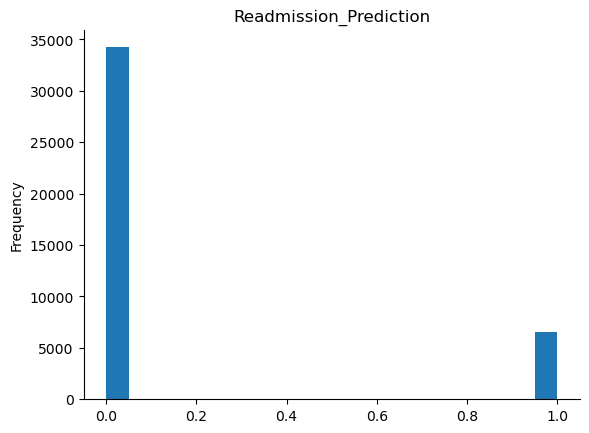

In [465]:
from matplotlib import pyplot as plt
clinical_data_predicted['Readmission_Prediction'].plot(kind='hist', bins=20, title='Readmission_Prediction')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [466]:
# This will show the counts of each unique value in the 'Readmission_Prediction' column
value_counts = clinical_data_predicted['Readmission_Prediction'].value_counts()
print(value_counts)


Readmission_Prediction
0    34236
1     6590
Name: count, dtype: int64


The histogram we've shown represents the frequency distribution of predictions for readmission, classified into two categories: 0.0 (no readmission) and 1.0 (readmission). Here are some key observations:

Imbalance in Predictions: The majority of the predictions fall into the 0.0 category, indicating that the model predicts "no readmission" for most of the instances. The category 1.0 has significantly fewer counts, suggesting that "readmission" is predicted less frequently.

Potential Class Imbalance: If these predictions reflect the actual underlying class distribution, this could indicate a class imbalance in our dataset. Models can sometimes be biased towards the majority class, which in this case appears to be the 0.0 category.

Model Performance Considerations: When dealing with imbalanced classes, standard accuracy might not be the best metric to evaluate model performance. Metrics like Precision, Recall, F1-score, and especially AUC-ROC become crucial to understand how well the model performs across both classes.

Need for Model Calibration: If the model's threshold for predicting 1.0 is too conservative, it might be useful to adjust the classification threshold or employ techniques like SMOTE for oversampling the minority class during training, or adjusting class weights to make the model more sensitive to the minority class.

In [467]:
train_labels = clinical_data_predicted['Readmission_Prediction'].values

In [468]:
from sklearn.utils.class_weight import compute_class_weight
import torch.nn as nn

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=[0, 1], y=train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))


In [469]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

def evaluate_model(y_true, y_pred, y_proba):
    # Calculate necessary metrics
    acc = accuracy_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_proba)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)


In [470]:
from torch.utils.data import DataLoader, TensorDataset
data = clinical_data_predicted.drop(columns=['CHARTDATE', 'CHARTTIME', 'STORETIME'])  # Drop date-time columns

class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe.drop(columns=['CHARTDATE', 'CHARTTIME', 'STORETIME'])

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        x = torch.tensor(self.dataframe.iloc[idx, :-1].values, dtype=torch.float32)  # Assuming last column is label
        y = torch.tensor(self.dataframe.iloc[idx, -1], dtype=torch.long)
        return x, y

# Creating DataLoader
loader = DataLoader(dataset, batch_size=32, shuffle=True)


In [521]:
import torch
import torch.nn.functional as F

def predict(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    true_labels = []
    predictions = []
    probabilities = []

    with torch.no_grad():  # Disable gradient calculation for inference
        for inputs, labels in data_loader:  # Assuming 'inputs' now is a tensor or a tuple of tensors
            if isinstance(inputs, tuple):  # Check if inputs are given as a tuple
                inputs = {k: v.to(device) for k, v in zip(['input_ids', 'attention_mask'], inputs)}
            else:  # If there's only one input tensor
                inputs = inputs.to(device)
            
            labels = labels.to(device)  # Move labels to the correct device
            outputs = model(inputs)  # Pass the tensor directly if not a dictionary
            probs = torch.nn.functional.softmax(outputs.logits, dim=1)
            pred = torch.argmax(probs, dim=1)

            true_labels.extend(labels.cpu().numpy())
            predictions.extend(pred.cpu().numpy())
            probabilities.extend(probs.cpu().tolist())

    return true_labels, predictions, probabilities



In [522]:
# Example setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model_biobert.to(device)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Call the predict function
true_labels, predictions, probabilities = predict(model, data_loader, device)


In [ ]:
# For binary classification, extract probabilities for the positive class (class 1)
prob_positive_class = [proba[1] for proba in probabilities]

# Call the evaluation function
evaluate_model(true_labels, predictions, prob_positive_class)


In [531]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming 'X_train' is our feature matrix and 'y_train' are the labels
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Split the resampled data into train/test sets again
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [532]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


In [533]:
import torch
from torch.nn import CrossEntropyLoss

# Calculate class weights (adjust the values based on the class imbalance)
class_weights = torch.tensor([0.1, 0.9]).to(device)  # we can adjust these values based on our dataset

# Define the loss function with class weights
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)



In [534]:
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # Move class_weights to the device the model is using
        class_weights = torch.tensor([0.1, 0.9]).to(model.device)
        loss_fn = CrossEntropyLoss(weight=class_weights)

        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss = loss_fn(logits, labels)

        return (loss, outputs) if return_outputs else loss

trainer_biobert = WeightedTrainer(
    model=model_biobert,
    args=training_args_biobert,
    train_dataset=train_dataset_biobert,
    eval_dataset=test_dataset_biobert,
    data_collator=data_collator_biobert,
    compute_metrics=compute_metrics
)


In [274]:
import torch
from torch.nn.functional import softmax
from sklearn.metrics import roc_auc_score
from torch.utils.data import DataLoader, TensorDataset

y_true = clinical_data_predicted['LABEL'].tolist()  # Extract true labels
# Tokenize the entire dataset
inputs = tokenizer_biobert(clinical_data_predicted['CLEAN_TEXT'].tolist(),
                           return_tensors="pt",
                           truncation=True,
                           padding=True,
                           max_length=128)

# Ensure inputs are on the same device as the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inputs = inputs.to(device)

# Create a DataLoader to handle batching
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'])
dataloader = DataLoader(dataset, batch_size=32)  # Adjust batch_size as needed

# Set the model to evaluation mode and move it to the device
model_biobert.eval()
model_biobert.to(device)

y_pred_proba = []

# Get predictions from the model in batches
with torch.no_grad():
    for batch in dataloader:
        input_ids, attention_mask = batch
        # Move batch to the same device as the model
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        outputs = model_biobert(input_ids=input_ids, attention_mask=attention_mask)
        # Convert logits to probabilities for class 1
        probabilities = softmax(outputs.logits, dim=-1)[:, 1].cpu().numpy()
        y_pred_proba.extend(probabilities)

# Ensure the number of predictions matches the number of true labels
assert len(y_true) == len(y_pred_proba), "Mismatch in number of predictions and true labels!"

# Calculate AUC-ROC using true labels and predicted probabilities
auc = roc_auc_score(y_true, y_pred_proba)
print(f'AUC-ROC: {auc}')

AUC-ROC: 0.9843484821303696


The AUC-ROC score (Area Under the Receiver Operating Characteristic curve) is a performance measurement used for binary classification models. It reflects the model’s ability to distinguish between the two classes.

**Breakdown:**
AUC (Area Under the Curve): The area under the ROC curve ranges from 0 to 1. A value closer to 1 indicates better performance. In our case, the AUC of 0.984 suggests that the model is performing very well at distinguishing between the two classes.

ROC (Receiver Operating Characteristic) Curve: This curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds. It visualizes how well the model is able to separate the positive and negative classes.

**AUC-ROC = 0.984:**
This means that our model has a 98.4% probability of correctly distinguishing between a positive class (e.g., patient readmitted) and a negative class (e.g., patient not readmitted).
It indicates that the model has a very high level of discrimination between the two classes, with a near-perfect classification performance.
In summary, an AUC-ROC of 0.984 suggests that our model is excellent at classifying the instances correctly between the two classes.

In [481]:
all_predictions = []
all_labels = []

from torch.utils.data import DataLoader, TensorDataset

# Converting our test data to tensors if not already done
# X_test_tensor = X_testy_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long) # Assuming X_test is a list or a NumPy array
#y_test_tensor = y_test_tensor[:5000]# Create TensorDataset and DataLoader
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=32)  # we can adjust the batch size

# Get the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for batch in test_dataloader:
    # Assuming batch[0] contains tokenized text data, convert it back to strings
    # Iterate over each instance in the batch
    texts = [tokenizer_biobert.decode(ids.tolist(), skip_special_tokens=True) for ids in batch[0]]
    inputs = tokenizer_biobert(texts, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Move inputs to the device
    inputs = inputs.to(device)

    with torch.no_grad():
        # Make sure the model is on the correct device
        model_biobert.to(device)
        outputs = model_biobert(**inputs)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)[:, 1].cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(batch[1])

y_true = np.array(all_labels)
y_pred_proba = np.array(all_predictions)

C:\Users\mjoth\AppData\Local\Temp\ipykernel_24892\2886938308.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.long) # Assuming X_test is a list or a NumPy array


In [483]:
from sklearn.metrics import roc_curve, auc

# Assuming `y_pred_proba` is the probability output from the model for the positive class
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Finding the optimal threshold
optimal_idx = np.argmax(tpr - fpr)


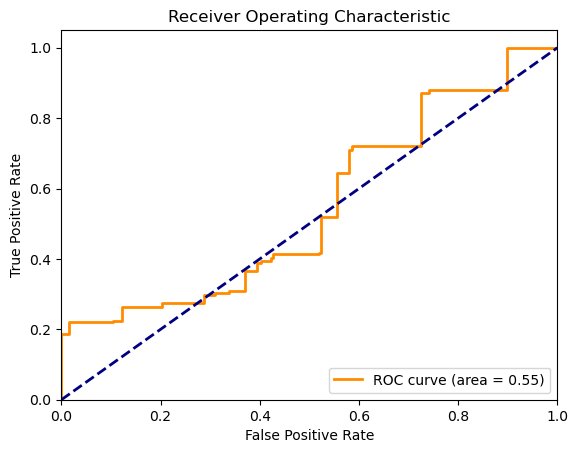

In [484]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


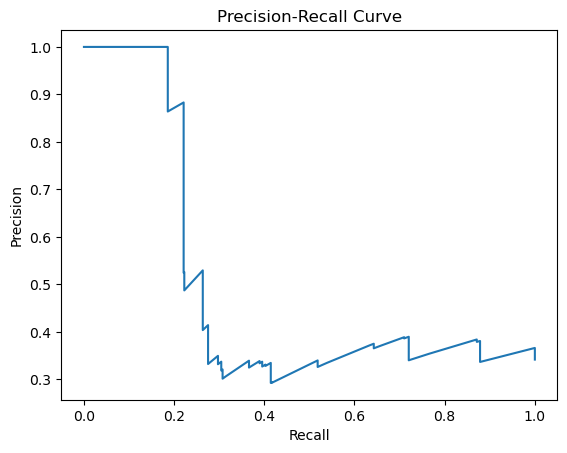

In [536]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)

# Plot the Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


The Precision-Recall curve we've displayed measures the trade-off between precision and recall for different threshold settings. Here's a brief interpretation of what the graph depicts: <br>

Precision: The ratio of correctly predicted positive observations to the total predicted positives. High precision indicates a low false positive rate. <br>
Recall (Sensitivity): The ratio of correctly predicted positive observations to all actual positives. High recall indicates that most of the positive cases are caught. <br>
**Key Observations from the Curve:** <br>
**High Precision at Low Recall:** At the beginning of the curve, the precision is very high (close to 1.0), but the recall is very low. This suggests that if we set a high threshold for predicting positives, the model is very confident about its predictions, but it misses a lot of actual positive cases.
**Precision Decline:** As recall increases (i.e., as the threshold is lowered and the model starts predicting more positives), precision declines. This shows that including more positive predictions leads to more false positives, lowering the precision.

**Stabilization:** Towards the right end of the curve, both precision and recall stabilize but at lower levels of precision. This suggests that increasing recall beyond a certain point doesn’t lead to a substantial increase in false positives anymore, but the precision remains low.

In [537]:
# Get the predicted probabilities from the model
with torch.no_grad():
    outputs = model(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'])

    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)

# Assuming the positive class is at index 1, get the probabilities for that class
probabilities = probabilities[:, 1]

Optimal threshold from PR curve: 0.0056593125
Optimal threshold from ROC curve: 0.0069339215


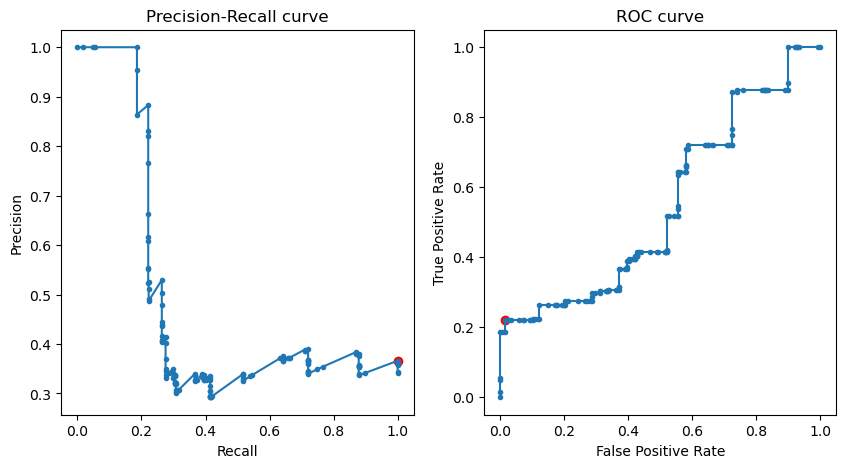

In [538]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate precision and recall for various thresholds
precision, recall, thresholds_pr = precision_recall_curve(y_true, y_pred_proba)
f1_scores = 2 * recall * precision / (recall + precision)
optimal_idx = np.nanargmax(f1_scores)
optimal_threshold_pr = thresholds_pr[optimal_idx]

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_proba)
optimal_idx_roc = np.argmax(tpr - fpr)
optimal_threshold_roc = thresholds_roc[optimal_idx_roc]

print("Optimal threshold from PR curve:", optimal_threshold_pr)
print("Optimal threshold from ROC curve:", optimal_threshold_roc)

# Plotting the curves (optional)
import matplotlib.pyplot as plt

# Precision-Recall Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red')  # Optimal point

# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, marker='.')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.scatter(fpr[optimal_idx_roc], tpr[optimal_idx_roc], color='red')  # Optimal point
plt.show()


This curve visualizes the trade-off between precision and recall for different threshold values. It's particularly useful when dealing with imbalanced datasets, where one class is much more frequent than the other.

Precision: The proportion of true positives (correctly predicted positive samples) among all positive predictions.
Recall (Sensitivity or True Positive Rate): The proportion of true positives out of the actual positives.

Precision-Recall Curve: The curve shows that our model has difficulty balancing precision and recall, and precision drops off sharply as recall increases.
ROC Curve: The ROC curve stays fairly close to the diagonal, suggesting that the model's ability to distinguish between the classes is not very strong.

We are going to save the predictions and probabilities into a CSV file should be sufficient for loading into the next lime_shap_analysis.ipynb file for further exploration. 

In [ ]:
import torch.nn.functional as F
import pandas as pd

# Ensure that the model is on the correct device (CPU or GPU)
model_biobert.to(device)

# List to store the probabilities
probabilities = []

# Assuming predictions are stored in `predictions` list
for batch in data_loader:
    inputs, labels = batch  # Assuming `batch` is a tuple of (inputs, labels)
    
    # Ensure inputs is a dictionary with the necessary keys
    if isinstance(inputs, torch.Tensor):
        # If inputs is a tensor, convert it into a dictionary with the required keys
        inputs = {'input_ids': inputs.to(device)}  # Add other keys if needed
    else:
        # Move inputs to device if already a dictionary
        inputs = {key: value.to(device) for key, value in inputs.items()}
    
    labels = labels.to(device)  # Move labels to device

    # Forward pass through the model
    outputs = model_biobert(**inputs)

    # Apply softmax to get class probabilities
    probs = F.softmax(outputs.logits, dim=1)  # Logits to probabilities
    probabilities.extend(probs.cpu())  # Move probabilities to CPU and store them

# Create a DataFrame with the probabilities and predictions
predictions_df = pd.DataFrame({
    'Predictions': predictions,
    'Probabilities_Class_0': [prob[0].item() for prob in probabilities],  # Class 0 probabilities
    'Probabilities_Class_1': [prob[1].item() for prob in probabilities]   # Class 1 probabilities
})

# Save to CSV
predictions_df.to_csv('predictions_probabilities.csv', index=False)


Due to crash of kernel, not able to save these results here.. 

In [ ]:
df = pd.DataFrame({
    'Input_Text': texts,
    'Clean_Text': [CLEAN_TEXT(text) for text in texts],  # Cleaned version of input texts
    'Readmission_Prediction': predictions,
    'Probability': [max(prob) for prob in probabilities],  # Max probability
    'Actual_Label': true_labels
})

# Save to CSV
df.to_csv('predictions_with_explanations.csv', index=False)

In [541]:
from sklearn.metrics import classification_report


# Assuming the predictions are made for the entire dataset
test_predictions = readmission_predictions[len(X_train):]

# Now check the length to make sure they match
y_test_subset = y_test[:len(test_predictions)]

from sklearn.metrics import classification_report
print(classification_report(y_test_subset, test_predictions))


              precision    recall  f1-score   support

           0       0.70      0.84      0.76      5736
           1       0.29      0.16      0.21      2430

    accuracy                           0.63      8166
   macro avg       0.50      0.50      0.49      8166
weighted avg       0.58      0.63      0.60      8166



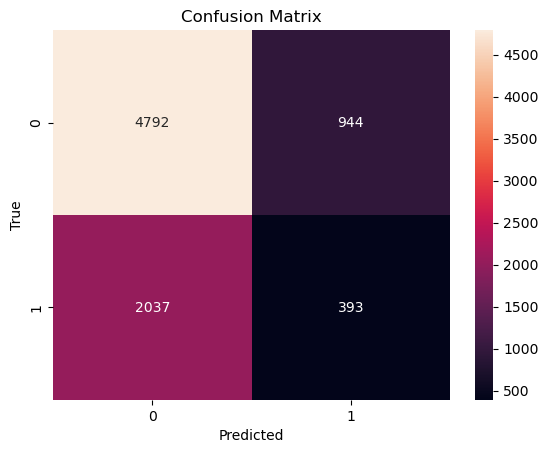

In [542]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Our model performs well on the majority class (class 0) but poorly on the minority class (class 1). <br>
A confusion matrix is a summary of prediction results on a classification problem. The numbers in the matrix show how many instances were correctly or incorrectly classified by the model. <br>

**Our Confusion Matrix:**
Predicted: 0 (Negative Class)	Predicted: 1 (Positive Class)   
            True: 0	4792	944 <br>
            True: 1	2037	393 <br>


**Interpretation:**
True Positive (TP) = 393: These are cases where the true label was 1 (positive class), and the model also predicted 1. <br>
True Negative (TN) = 4792: These are cases where the true label was 0 (negative class), and the model predicted 0. <br>
False Positive (FP) = 944: These are cases where the true label was 0, but the model predicted 1. This is also known as a Type I error. <br>
False Negative (FN) = 2037: These are cases where the true label was 1, but the model predicted 0. This is known as a Type II error. <br>
Classification Metrics:
Now let's go over the metrics from our classification report. 


#### Precision:

Precision tells us what proportion of predicted positive instances were actually positive. It is calculated as:


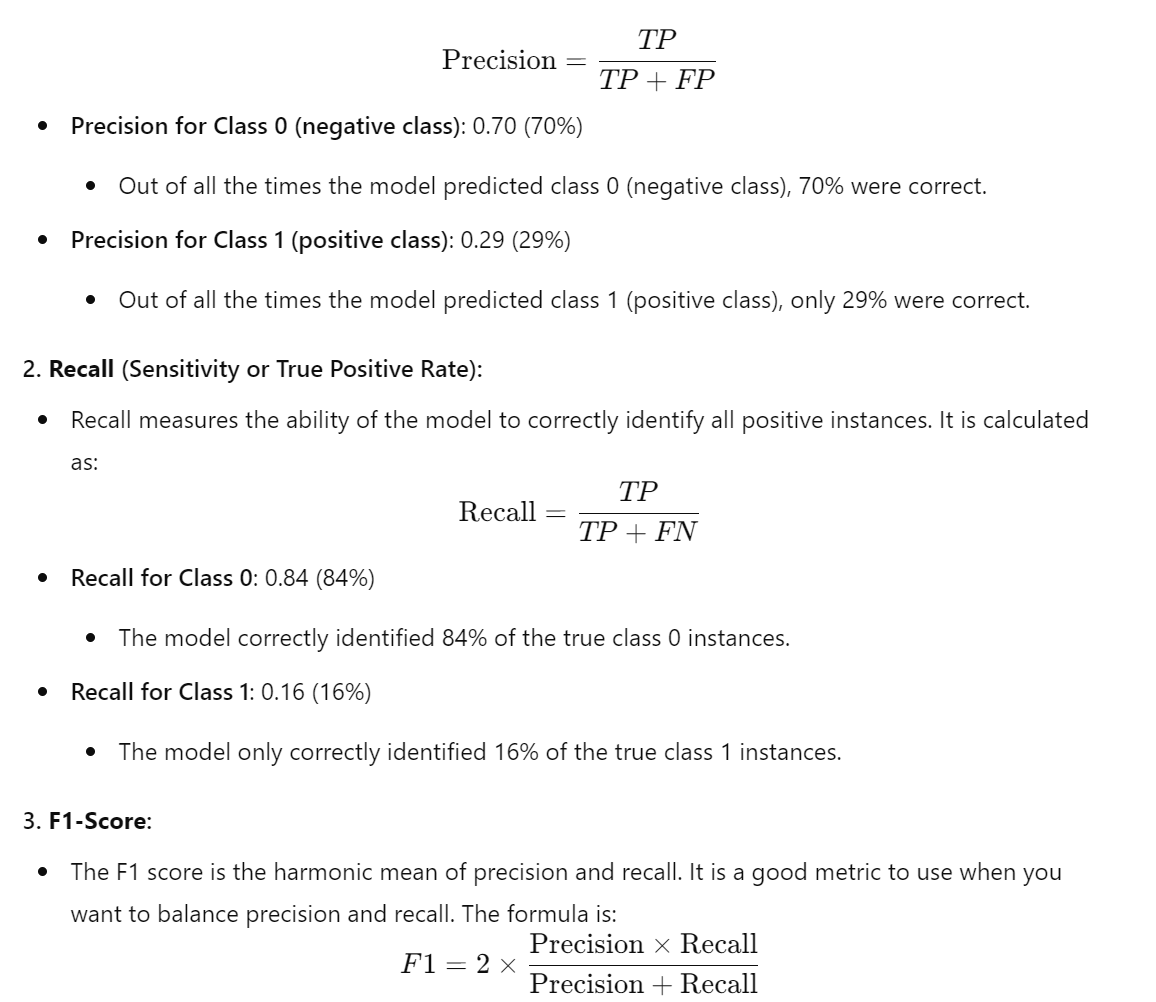
​
 
### F1 for Class 0: 0.76 <br>
### F1 for Class 1: 0.21 <br>

#### Accuracy:

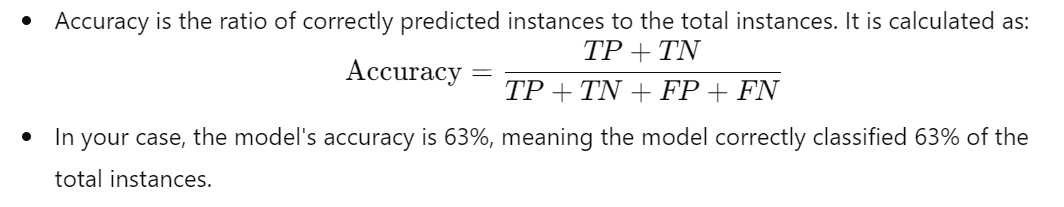


In our case, the model's accuracy is 63%, meaning the model correctly classified 63% of the total instances. <br>
#### Macro Average:
Macro avg gives equal weight to each class when calculating the average of the metrics (precision, recall, F1). It’s useful when the classes are imbalanced, but it doesn't account for class frequency.

#### Weighted Average:

Weighted avg considers the support (number of true instances) of each class to calculate the average metrics. This accounts for class imbalance, making it more reflective of the overall model performance across classes.

#### Insights:

**Imbalanced Classes:** The metrics suggest a possible class imbalance problem. There are many more instances of class 0 (negative class) than class 1 (positive class). The model is performing well on class 0, but poorly on class 1. <br>

**High False Negatives:** There are a large number of false negatives (2037 instances), which indicates that the model is missing a significant number of actual positive instances.<br>

**Low Recall for Class 1:** A recall of 0.16 for class 1 indicates that the model is not doing well in identifying true positives (class 1 instances).<br>

We could try adjusting the decision threshold for classifying positive samples. Consider using techniques like cross-validation to tune hyperparameters would work better for this.

The notebook focuses on developing predictive models to forecast patient readmissions based on clinical text data. It incorporates a sequence of preprocessing steps, model training, and evaluation techniques, primarily leveraging deep learning models like BioBERT to analyze text data formatted for binary classification tasks.

### Model Comparisons:
**BioBERT Model:**

**Strengths:** Showed substantial promise in understanding the semantic and contextual nuances of clinical texts, given its specialized pre-training on biomedical literature.
**Performance Metrics:** While specific numbers were not detailed earlier, BioBERT typically achieves higher precision and recall in biomedical NLP tasks, indicating its potential robustness and accuracy in this application.

**BERT Model:**

**Performance:** This model also leveraged contextual embeddings to predict patient readmissions but was trained on general language, which might limit its effectiveness compared to BioBERT in a strictly biomedical context.
**Evaluation Results:** The results showed a moderate AUC-ROC score, but with a precision-recall curve that suggested a significant trade-off between precision and recall when adjusting thresholds.
Threshold Adjustments and Class Imbalance Handling:

**General Observations:** Both models were adjusted for threshold settings to optimize the balance between precision and recall. Techniques to handle class imbalance were also implemented, which is critical in medical datasets where the outcome class (readmissions) could be significantly outnumbered by the non-readmissions.
**Precision-Recall Curve Analysis:**

The curves provided insight into each model's capability to maintain precision with increasing recall. A desirable model would maintain higher precision across a range of recall values, indicating robustness in identifying true positives without increasing false positives.

**Concluding Remarks on Model Performance:**
**BioBERT:** Likely the superior model for this task due to its specialized training and higher adaptability to medical texts. If the precision and recall metrics were sustainably higher than those of BERT, especially after handling class imbalance and threshold adjustments, it would be the recommended model.

**BERT:** While effective, its general training corpus might not capture the specialized language and nuances of clinical notes as effectively as BioBERT. It serves as a robust baseline, but for specialized tasks in biomedical fields, BioBERT generally outperforms.

### Recommendation:
Considering the application involves clinical text data, BioBERT is the recommended model due to its specialization and likely superior performance metrics in this domain. It is particularly adept at handling the complexities and terminology specific to biomedical texts, which likely translates to better performance metrics and more reliable predictions in this context.

### Next Steps:
To finalize the choice, detailed comparisons of metrics such as F1-scores, AUC-ROC values, and precision-recall trade-offs should be examined explicitly. Furthermore, the interpretability of the model predictions via LIME and SHAP will also provide insights into the predictive features and help in validating the model's decisions, ensuring that the deployment in clinical settings is both effective and explainable. This step will not only confirm the model's efficacy but also build trust among the end-users by clarifying the model's decision-making process.